In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('../ML471_S4_Datafile_Concept.csv')

c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1
ssr based chi2 test:   chi2=6.4199  , p=0.0113  , df=1
likelihood ratio test: chi2=6.3684  , p=0.0116  , df=1
parameter F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2
ssr based chi2 test:   chi2=27.6791 , p=0.0000  , df=2
likelihood ratio test: chi2=26.7524 , p=0.0000  , df=2
parameter F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3
ssr based chi2 test:   chi2=9.5208  , p=0.0231  , df=3
likelihood ratio test: chi2=9.4076  , p=0.0243  , df=3
parameter F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2370  , p=0.2946  

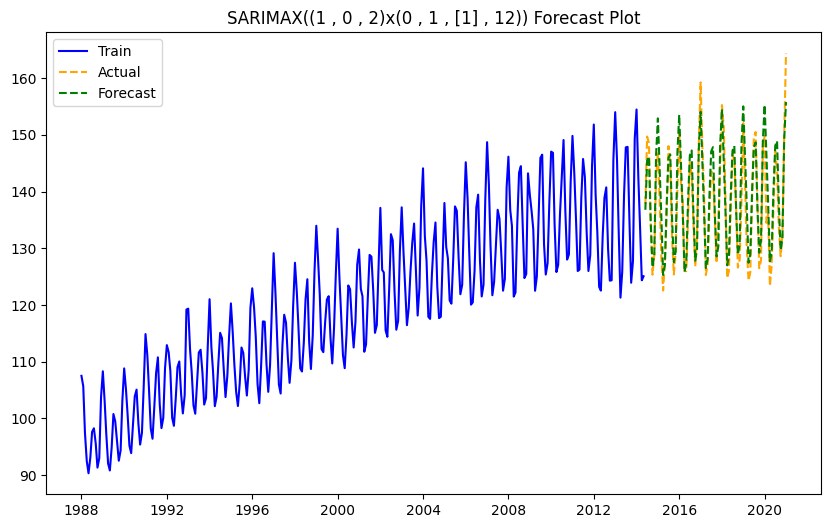

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index("Datetime", inplace=True)

target = df["Consumption"]
exog = df[['Festivals/Special_events']] 

size = int(len(df) * 0.8)
train_target, test_target = target[:size], target[size:]
exog_train, exog_test = exog[:size], exog[size:]

granger_date = pd.concat([target, exog], axis=1)

grangercausalitytests(granger_date[['Consumption', 'Festivals/Special_events']], maxlag=12 , verbose=True)

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_target, exog=exog_train, order=(1,0,2), seasonal_order=(0,1,1,12) , enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(disp=False)

forecast = model_fit.get_forecast(steps=len(test_target), exog=exog_test)
predicted_mean = forecast.predicted_mean

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('SARIMAX((1 , 0 , 2)x(0 , 1 , [1] , 12)) Forecast Plot')
plt.plot(train_target.index, train_target, label='Train' , color='blue')
plt.plot(test_target.index, test_target, label='Actual' , color='orange'  , linestyle='--')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast' , color='green' , linestyle='--')
plt.legend()
plt.show()